In [35]:
import os
import pandas as pd

Training image paths and labels

In [14]:
#csv files path
path = './data'
train_image_paths_csv = 'train_image_paths.csv' # these images are for the wrist XRays only
test_image_paths_csv = 'test_image_paths.csv'

In [15]:
train_image_paths = pd.read_csv(os.path.join(path,train_image_paths_csv),dtype=str,header=None) # using pandas to read the image paths of our images from the CSV file
train_image_paths.columns = ['image_path']
train_image_paths.head()

,image_path
0,data/train/XR_WRIST/patient06359/study1_positi...
1,data/train/XR_WRIST/patient06359/study1_positi...
2,data/train/XR_WRIST/patient06360/study1_positi...
3,data/train/XR_WRIST/patient06360/study1_positi...
4,data/train/XR_WRIST/patient06360/study1_positi...


In [16]:
test_image_paths = pd.read_csv(os.path.join(path,test_image_paths_csv),dtype=str,header=None) # now reading the test images
test_image_paths.columns = ['image_path']
test_image_paths.head()

,image_path
0,data/test/XR_WRIST/patient11185/study1_positiv...
1,data/test/XR_WRIST/patient11185/study1_positiv...
2,data/test/XR_WRIST/patient11185/study1_positiv...
3,data/test/XR_WRIST/patient11185/study1_positiv...
4,data/test/XR_WRIST/patient11186/study1_positiv...


In [17]:
train_image_paths['label'] = train_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0) # lets us break down the image path to get the label (it is in the directory)
train_image_paths['patient_id']  = train_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient','')) # also getting the patient ID but this is less important
train_image_paths.head()

,image_path,label,patient_id
0,data/train/XR_WRIST/patient06359/study1_positi...,1,06359
1,data/train/XR_WRIST/patient06359/study1_positi...,1,06359
2,data/train/XR_WRIST/patient06360/study1_positi...,1,06360
3,data/train/XR_WRIST/patient06360/study1_positi...,1,06360
4,data/train/XR_WRIST/patient06360/study1_positi...,1,06360


In [18]:
test_image_paths['label'] = test_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0) # doing the same with the test imaged path as we did above
test_image_paths['patient_id']  = test_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))
test_image_paths.head()

,image_path,label,patient_id
0,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
1,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
2,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
3,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
4,data/test/XR_WRIST/patient11186/study1_positiv...,1,11186


In [19]:
print(train_image_paths['image_path'].size)
print(test_image_paths['image_path'].size)

9752
659


https://www.kaggle.com/code/pratinavseth/mura-classification-ensemble

In [20]:
train_image_paths.columns

Index(['image_path', 'label', 'patient_id'], dtype='object')

Text(0.5, 1.0, 'Negative Test')

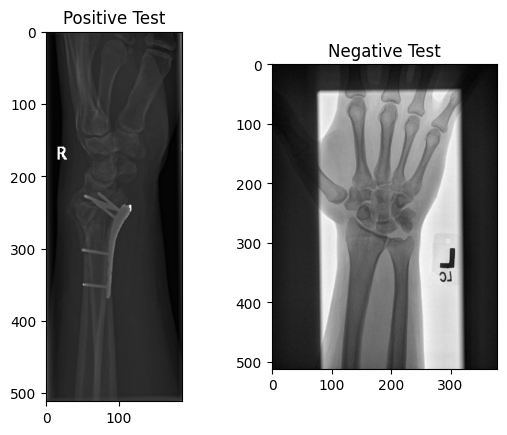

In [21]:
import matplotlib.pyplot as plt

# printing out a couple of our training images

img1 = plt.imread(train_image_paths['image_path'][0])
img2 = plt.imread(train_image_paths['image_path'][147])


figure = plt.figure()
figure.add_subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Positive Test")

figure.add_subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Negative Test")

In [22]:
# shuffling the data frame
# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

train_image_paths = train_image_paths.sample(frac=1).reset_index(drop=True)
test_data = test_image_paths.sample(frac=1).reset_index(drop=True)

In [23]:
train_data = train_image_paths[0:8710] # splitting up the data for train and validation
train_image_paths = train_image_paths[8710:]

valid_data = train_image_paths[0:1042]
train_image_paths = train_image_paths[1042:]

In [24]:
print(len(train_data))
print(len(valid_data))

8710
1042


In [25]:
valid_data.reset_index(drop=True, inplace=True) # resetting the indexes so that they start at zero (array slicing is odd with pandas dataframes)
test_data.reset_index(drop=True, inplace=True)

This section will allow us to determine the balance of the data and how we've split it

In [575]:
pos_train_count = 0
for i in range(1, len(train_data)): # counting how many of each image is abnormal (in train, valid, and test)
    if train_data['label'][i] == 1:
        pos_train_count += 1

pos_valid_count = 0
for i in range(len(valid_data)):
    if valid_data['label'][i] == 1:
        pos_valid_count += 1

pos_test_count = 0
for i in range(len(test_data)):
    if test_data['label'][i] == 1:
        pos_test_count +=1

In [576]:
# determining what percentage of the data is a positive test, and what percentage of the total images is allocated to each category

total_images = len(train_data) + len(valid_data) + len(test_data)
print("Total number of images: ", total_images, '\n')

print("Train image split: ", round(100 * len(train_data) / total_images), "%") # training
print("Percentage of positive labels", round(100 * pos_train_count / len(train_data)), "%\n")

print("Validation image split: ", round(100 * len(valid_data) / total_images), "%") # validation
print("Percentage of positive labels", round(100 * pos_valid_count / len(valid_data)), "%\n")

print("Test image split: ", round(100 * len(test_data) / total_images), "%") # testing
print("Percentage of positive labels", round(100 * pos_test_count / len(test_data)), "%")

Total number of images:  10411 

Train image split:  84 %
Percentage of positive labels 41 %

Validation image split:  10 %
Percentage of positive labels 39 %

Test image split:  6 %
Percentage of positive labels 45 %


We can see that the data is well split, with 80% of data for training, 10% for validation, and 10% for testing. Within these groups the data is also reasonably balanced (the percentage of positive labels is relatively close to 50%, and there is no significant difference in the amount of positives that each set has).

In [26]:
from keras.preprocessing.image import ImageDataGenerator


# data generators for training and validation
# keeping the data augmentation at a minimum because the model is prone to stop training if it is altered too much. 

train_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 5, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1,
    zoom_range = 0.1, 
    horizontal_flip = True,
    vertical_flip = True
    )
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data, 
    x_col='image_path', # because it is coming from a dataframe we have to specify which columns the data and label are coming from
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale') # I think that the default is RGB, so training was taking longer than it should have because it was training on a shape (128, 128, 3) when it was really (128, 128, 1)
                              # switching to greyscale sped up the training process

valid_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False
    )
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale'   
)


Found 8710 validated image filenames.
Found 1042 validated image filenames.


In [578]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 128, 128, 1)
labels batch shape: (64,)


In [601]:
from keras import layers
from keras import models

# fairly simple CNN 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.05)) # some dropout to stop overfitting, but not a lot
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid activation because of a binary classification problem
model.compile(loss='binary_crossentropy',
            optimizer='nadam', 
            metrics=['acc'])


In [602]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)     

In [603]:
history = model.fit(
    train_generator,
    steps_per_epoch=136, # 8710 (number of images) / 64 (batch size) = 136
    epochs=30,
    validation_data=valid_generator,
    validation_steps=16 # 1042 (number of images) / 64 (batch size) = 16
)

Epoch 1/30
136/136 [==============================] - 27s 189ms/step - loss: 0.6649 - acc: 0.6129 - val_loss: 0.6533 - val_acc: 0.6279
Epoch 2/30
136/136 [==============================] - 25s 187ms/step - loss: 0.6496 - acc: 0.6258 - val_loss: 0.6390 - val_acc: 0.6533
Epoch 3/30
136/136 [==============================] - 26s 190ms/step - loss: 0.6213 - acc: 0.6529 - val_loss: 0.6050 - val_acc: 0.6699
Epoch 4/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5819 - acc: 0.6963 - val_loss: 0.5508 - val_acc: 0.7051
Epoch 5/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5406 - acc: 0.7334 - val_loss: 0.5003 - val_acc: 0.7568
Epoch 6/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5222 - acc: 0.7450 - val_loss: 0.4987 - val_acc: 0.7695
Epoch 7/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5109 - acc: 0.7550 - val_loss: 0.5004 - val_acc: 0.7568
Epoch 8/30
136/136 [==============================] - 2

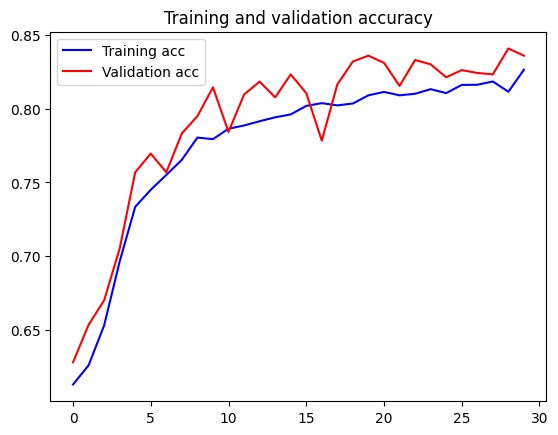

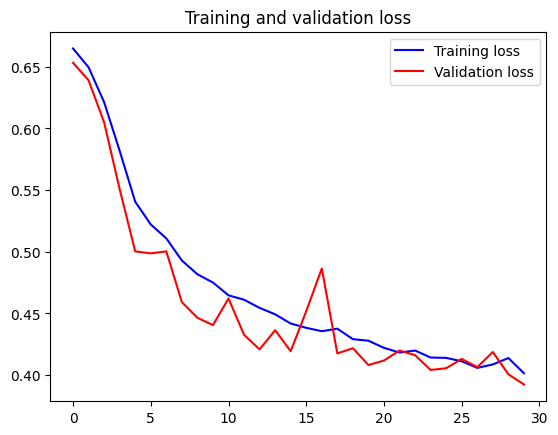

In [604]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Overfitting analysis:

Not really any overfitting present in the model. If I train the model past 30 epochs then it will start to overfit. 

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255,
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=659,
    label_mode='int', 
    class_mode='other',
    color_mode = 'grayscale',
    shuffle=False   # keeping shuffle false so that I can get a fair assessment of the model every time
)

Found 659 validated image filenames.


In [606]:
model.evaluate(test_generator, steps=1)

1/1 [==============================] - 1s 1s/step - loss: 0.4577 - acc: 0.8027


[0.45769569277763367, 0.8027313947677612]

## Results:

The results for the wrist XRays only was 80.2%. I have not seen any wrist only models, so I cannot say for sure how I stack up against them.



In regards to the comparison of Stanford and their model & radiologists, I was able to beat out one of their radiologists, but was not better than their model.

Radiologist 2, Radiologist 3, and the model strangely all achieved the same accuracy, even having the same accuracy in the first and second view, but I could not find anything in their paper that explains this.

It should also be noted that my methodology was different from that of Stanford's. Instead of giving each case two views and calculating a probability of abnormality based on these views, I treated each image as its own case. I believe that if I used a model with multiple views I should be able to achieve a higher accuracy.

In [614]:
model.save('MURA_model.h5') # saving the model just in case

Going to attempt to use the model only trained on wrist images and see how it does when tested on every body part.

In [32]:
from keras import models

loaded_model = models.load_model('MURA_model.h5') # loading our saved model

In [33]:
patient_path = './MURA-v1.1/'
patient_image_paths_csv = 'valid_image_paths.csv' # all of our data generator code is now going to be different because we are going to evaluate it on all the body parts

In [36]:
patient_image_paths = pd.read_csv(os.path.join(patient_path,patient_image_paths_csv),dtype=str,header=None)
patient_image_paths.columns = ['image_path']
patient_image_paths.head()

,image_path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [ ]:
print(patient_image_paths.loc[0])

image_path    MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
Name: 0, dtype: object


In [ ]:
patient_image_paths['label'] = patient_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0)
patient_image_paths['patient_id']  = patient_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient','') + '_study' + x.split('/')[4][5:6])
patient_image_paths.head()

,image_path,label,patient_id
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,11186_study1


In [ ]:
patient_test_datagen = ImageDataGenerator(rescale=1./255,
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False)
patient_test_generator = patient_test_datagen.flow_from_dataframe( # the exact same test data generator from the previous model, except with the new dataframe containing all of the data
    dataframe=patient_image_paths, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=799,
    label_mode='int', 
    class_mode='other',
    color_mode = 'grayscale',
    shuffle=False    
)

Found 3197 validated image filenames.


In [ ]:
loaded_model.evaluate(patient_test_generator, steps=4)

4/4 [==============================] - 6s 2s/step - loss: 0.7044 - acc: 0.6452


[0.7044167518615723, 0.6451814770698547]

## Results:

Unsurprisingly not a great result, as the model has not been trained on any of the other body parts. 

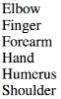

Achieved a 64.5% accuracy, while the Stanford model was a 70.5%. On the MURA accuracy leaderboard, this places this model 59th in highest accuracy. 

Next I am going to attempt to train a model using the entire dataset.


In [ ]:
all_path = './MURA-v1.1/' # we now need the data for all of the body parts to train a model on the complete data set
all_train_image_paths_csv = 'train_image_paths.csv'
all_image_paths = pd.read_csv(os.path.join(all_path, all_train_image_paths_csv),dtype=str,header=None)
all_image_paths.columns = ['image_path']
all_image_paths.head()

,image_path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [ ]:
all_image_paths['label'] = all_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0)
all_image_paths['patient_id']  = all_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient','') + '_study' + x.split('/')[4][5:6])
all_image_paths.head()

,image_path,label,patient_id
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,00001_study1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,00001_study1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,00001_study1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,00002_study1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,00002_study1


In [ ]:
all_image_paths = all_image_paths.sample(frac=1).reset_index(drop=True)

In [ ]:
all_train_data = all_image_paths[0:8710] # not going to train using all of the images in the dataset for the sake of time, doing the same amount as the previous model
all_image_paths = all_image_paths[8710:]

all_valid_data = all_image_paths[0:1042]
all_image_paths = all_image_paths[1042:]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
all_train_datagen = ImageDataGenerator(rescale=(1./255), # nothing has changed in terms of data agumentation or the data generator
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 5, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1,
    zoom_range = 0.1, 
    horizontal_flip = True,
    vertical_flip = True
    )

all_train_generator = all_train_datagen.flow_from_dataframe(
    dataframe=all_train_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale')

all_valid_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False
    )
all_valid_generator = all_valid_datagen.flow_from_dataframe(
    dataframe=all_valid_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale'   
)

Found 8710 validated image filenames.
Found 1042 validated image filenames.


In [ ]:
from keras import layers
from keras import models

# same CNN structure as the previous model

all_model = models.Sequential()
all_model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(128, 128, 1)))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Flatten())

all_model.add(layers.Dropout(0.05))
all_model.add(layers.Dense(512, activation='relu'))
all_model.add(layers.Dense(1, activation='sigmoid'))
all_model.compile(loss='binary_crossentropy',
            optimizer='nadam', 
            metrics=['acc'])

In [ ]:
history_two = all_model.fit(
    all_train_generator,
    steps_per_epoch=125, 
    epochs=30,
    validation_data=all_valid_generator,
    validation_steps=16
)

Epoch 1/30
125/125 [==============================] - 64s 502ms/step - loss: 0.6783 - acc: 0.5830 - val_loss: 0.6753 - val_acc: 0.5908
Epoch 2/30
125/125 [==============================] - 26s 207ms/step - loss: 0.6666 - acc: 0.5997 - val_loss: 0.6512 - val_acc: 0.6318
Epoch 3/30
125/125 [==============================] - 23s 181ms/step - loss: 0.6518 - acc: 0.6176 - val_loss: 0.6434 - val_acc: 0.6270
Epoch 4/30
125/125 [==============================] - 23s 182ms/step - loss: 0.6465 - acc: 0.6204 - val_loss: 0.6443 - val_acc: 0.6445
Epoch 5/30
125/125 [==============================] - 23s 185ms/step - loss: 0.6359 - acc: 0.6357 - val_loss: 0.6155 - val_acc: 0.6680
Epoch 6/30
125/125 [==============================] - 24s 188ms/step - loss: 0.6211 - acc: 0.6537 - val_loss: 0.6342 - val_acc: 0.6309
Epoch 7/30
125/125 [==============================] - 24s 188ms/step - loss: 0.6068 - acc: 0.6725 - val_loss: 0.6165 - val_acc: 0.6689
Epoch 8/30
125/125 [==============================] - 2

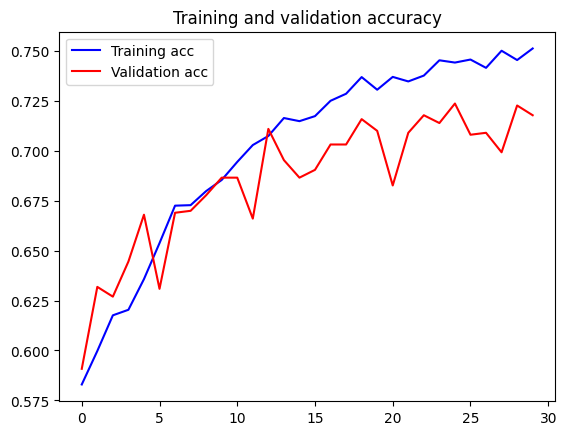

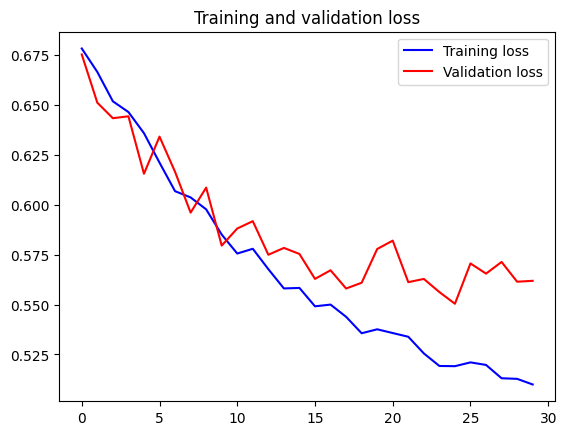

In [ ]:
import matplotlib.pyplot as plt
acc = history_two.history['acc']
val_acc = history_two.history['val_acc']
loss = history_two.history['loss']
val_loss = history_two.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Overfitting analysis:
The model clearly starts to overfit after 10ish epochs, but I have tried early stopping at 10 epochs and it still manages to be less accurate than this model that slightly overfits.

In [ ]:
all_model.evaluate(patient_test_generator, steps=4)

4/4 [==============================] - 6s 2s/step - loss: 0.5879 - acc: 0.7087


[0.5879121422767639, 0.7086983919143677]

In [ ]:
from keras import models
all_model.save('all_model.h5')

## Results:

This model did much better than the previous model only trained on wrist XRays. This model achieved a 72.3% accuracy compared to the 64.5% accuracy of the previous model. This model also manages to be more accurate than the Stanford model (70.5%). 

This accuracy boosts the model's ranking from 59th on the MURA dataset leaderboard to 29th.

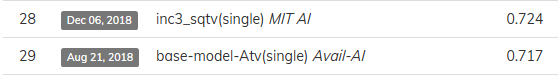

Similar to the wrist model, this model only looks at 1 view before making a prediction. Updating it to a multi-view model like the Stanford model should yield a better result.

In [6]:
from keras import models
loaded_model = models.load_model('all_model.h5')

In [7]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)     

https://keras.io/examples/vision/grad_cam/

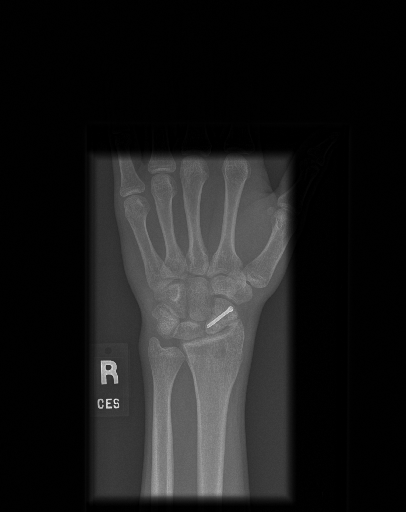

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

model_builder = keras.applications.xception.Xception
img_size = (128, 128, 1)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "max_pooling2d_8"

img_path = "MURA-v1.1/valid/XR_WRIST/patient11188/study1_positive/image1.png"

display(Image(img_path))

In [9]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size, grayscale=True)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

c:\Users\tommy\miniconda3\envs\DL\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 5s 5s/step


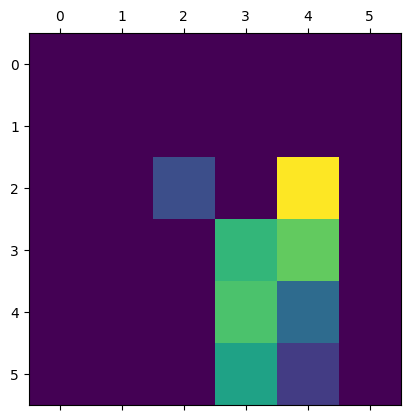

In [11]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))
#loaded_model.layers[-1].activation = None
preds = loaded_model.predict(img_array)
heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

plt.matshow(heatmap)
plt.show()

C:\Users\tommy\AppData\Local\Temp\ipykernel_13232\488390952.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


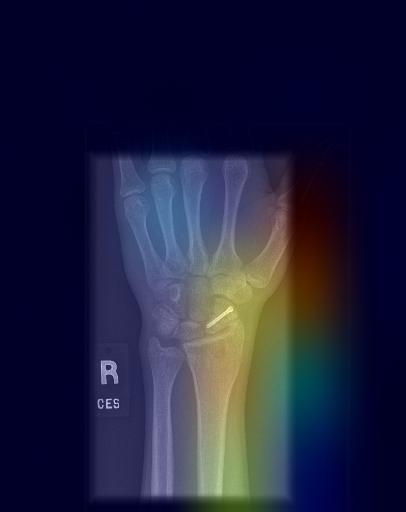

In [12]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else's work as my own. - Thomas Brandon